In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/new project/super.xlsx')

In [6]:
df

,Row ID,Order ID,Order Date,Delivery Date,Delivery Mode,Customer ID,Customer Name,Customer Segment,Country,Address Region,Address SD,Address SGG,Product ID,Product Name,Product Category,Product Sub-Category,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,빠른배송,CG-12520,류미령,개인고객,대한민국,호남,광주광역시,북구,FUR-BO-10001798,Bush Somerset Collection Bookcase,가구,책장,3.173645e+05,2,0.00,50778.3264
1,2,CA-2020-152156,2020-11-08,2020-11-11,빠른배송,CG-12520,류미령,개인고객,대한민국,호남,광주광역시,북구,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",가구,의자,8.867453e+05,3,0.00,266023.5930
2,3,CA-2020-138688,2020-06-12,2020-06-16,빠른배송,DV-13045,문윤재,기업고객,대한민국,수도권,경기도,광명시,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,사무용품,라벨류,1.771213e+04,2,0.00,8324.7011
3,4,US-2019-108966,2019-10-11,2019-10-18,일반배송,SO-20335,천경아,개인고객,대한민국,수도권,서울특별시,용산구,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,가구,책상,1.160105e+06,5,0.45,-464042.0565
4,5,US-2019-108966,2019-10-11,2019-10-18,일반배송,SO-20335,천경아,개인고객,대한민국,수도권,서울특별시,용산구,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,사무용품,수납제품,2.709883e+04,2,0.20,3048.6186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,빠른배송,TB-21400,허종수,개인고객,대한민국,영남,경상북도,영덕군,FUR-FU-10001889,Ultra Door Pull Handle,가구,가구소품,3.058795e+04,3,0.20,4970.5422
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,일반배송,DB-13060,문율,개인고객,대한민국,수도권,경기도,평택시,FUR-FU-10000747,Tenex B1-RE Series Chair Mats for Low Pile Car...,가구,가구소품,1.114095e+05,2,0.00,18939.6218
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,일반배송,DB-13060,문율,개인고객,대한민국,수도권,경기도,평택시,TEC-PH-10003645,Aastra 57i VoIP phone,전자제품,전화기,3.132648e+05,2,0.20,23494.8618
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,일반배송,DB-13060,문율,개인고객,대한민국,수도권,경기도,평택시,OFF-PA-10004041,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",사무용품,종이류,3.586040e+04,4,0.00,16137.1800


In [7]:
numeric = ['Sales','Quantity','Discount']

outlier = []

for i in numeric:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)][i]

    outlier_count = outliers.count()

    total_count = df[i].count()

    outlier_ratio = (outlier_count / total_count) * 100

    outlier.append({
        '변수명': i,
        '이상치 개수': outlier_count,
        '전체 개수': total_count,
        '이상치 비율(%)': round(outlier_ratio, 2)
    })


outlier_df = pd.DataFrame(outlier)
outlier_df = outlier_df.sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.reset_index(drop=True, inplace=True)

outlier_df



,변수명,이상치 개수,전체 개수,이상치 비율(%)
0,Sales,1167,9994,11.68
1,Discount,856,9994,8.57
2,Quantity,170,9994,1.70


In [8]:
print(np.round(df['Sales'].skew(),3))

12.973


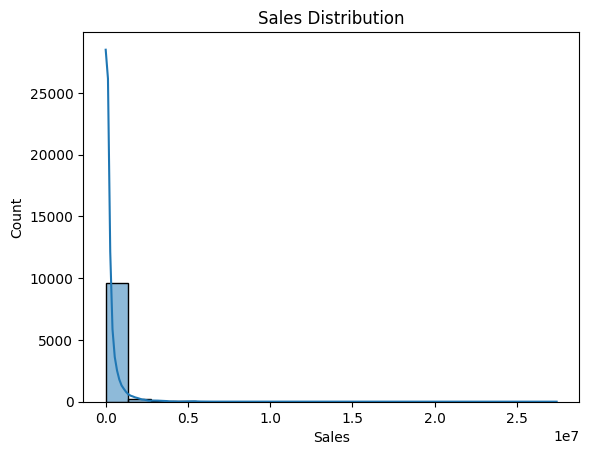

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

In [10]:
import numpy as np
df['log_sales']= np.log1p(df['Sales'])

numeric = ['log_sales','Quantity','Discount']

outlier = []

for i in numeric:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)][i]

    outlier_count = outliers.count()

    total_count = df[i].count()

    outlier_ratio = (outlier_count / total_count) * 100

    outlier.append({
        '변수명': i,
        '이상치 개수': outlier_count,
        '전체 개수': total_count,
        '이상치 비율(%)': round(outlier_ratio, 2)
    })


outlier_df = pd.DataFrame(outlier)
outlier_df = outlier_df.sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.reset_index(drop=True, inplace=True)

outlier_df

,변수명,이상치 개수,전체 개수,이상치 비율(%)
0,Discount,856,9994,8.57
1,Quantity,170,9994,1.70
2,log_sales,8,9994,0.08


In [11]:
df['log_sales']= np.log1p(df['Sales'])

bins = [-0.01, 0.05, 0.2, 0.5, 1.0]
labels = ['low', 'mid', 'high', 'extreme']

df['Discount_level'] = pd.cut(df['Discount'], bins=bins, labels=labels)

df['duration']=(df['Delivery Date']-df['Order Date']).dt.days
df.drop(['Customer ID','Row ID','Delivery Mode','Order ID','Order Date','Delivery Date','Customer Name','Country','Product Name','Sales','Discount','Product Category','Product Sub-Category'],axis=1,inplace=True)
df

,Customer Segment,Address Region,Address SD,Address SGG,Product ID,Quantity,Profit,log_sales,Discount_level,duration
0,개인고객,호남,광주광역시,북구,FUR-BO-10001798,2,50778.3264,12.667810,low,3
1,개인고객,호남,광주광역시,북구,FUR-CH-10000454,3,266023.5930,13.695314,low,3
2,기업고객,수도권,경기도,광명시,OFF-LA-10000240,2,8324.7011,9.782061,low,4
3,개인고객,수도권,서울특별시,용산구,FUR-TA-10000577,5,-464042.0565,13.964022,high,7
4,개인고객,수도권,서울특별시,용산구,OFF-ST-10000760,2,3048.6186,10.207283,mid,7
...,...,...,...,...,...,...,...,...,...,...
9989,개인고객,영남,경상북도,영덕군,FUR-FU-10001889,3,4970.5422,10.328394,mid,2
9990,개인고객,수도권,경기도,평택시,FUR-FU-10000747,2,18939.6218,11.620977,low,5
9991,개인고객,수도권,경기도,평택시,TEC-PH-10003645,2,23494.8618,12.654807,mid,5
9992,개인고객,수도권,경기도,평택시,OFF-PA-10004041,4,16137.1800,10.487417,low,5


In [12]:
mang=df[df['Profit']<0]
mang.reset_index(drop=True,inplace=True)

loss_counts=mang['Product ID'].value_counts()
total_counts=df['Product ID'].value_counts()

p=loss_counts.reindex(total_counts.index,fill_value=0)/total_counts
p=pd.DataFrame(p)
p=p.reset_index()
p.columns=['Product ID','Loss Ratio']
p=p.sort_values(by='Loss Ratio',ascending=False).reset_index(drop=True)

sum_of_profit=df.groupby('Product ID')['Profit'].sum().reset_index()
sum_of_profit

p=p.merge(sum_of_profit,on='Product ID', how='inner')
p


,Product ID,Loss Ratio,Profit
0,FUR-BO-10002206,1.0,-1.537175e+04
1,TEC-MA-10003589,1.0,-1.998415e+05
2,TEC-PH-10004875,1.0,-2.516770e+03
3,TEC-MA-10004125,1.0,-4.652148e+06
4,TEC-MA-10003230,1.0,-2.358791e+04
...,...,...,...
1857,OFF-ST-10000464,0.0,1.128595e+05
1858,OFF-FA-10002676,0.0,9.209823e+03
1859,TEC-PH-10004922,0.0,1.582589e+05
1860,OFF-PA-10004359,0.0,1.031449e+06


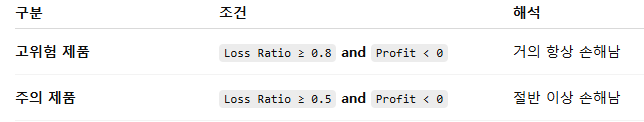

In [13]:
def cr(x):
  if x['Loss Ratio']>=0.8 and x['Profit']<0:
    return '고위험군'
  elif 0.5<= x['Loss Ratio']<0.8 and x['Profit']<0:
    return '위험군'
  else:
    return '양호'

p['등급']=p.apply(cr,axis=1)

p['등급'].value_counts()


,count
등급,
양호,1628
위험군,162
고위험군,72


In [14]:
problem=p[(p['등급']=='고위험군')|(p['등급']=='위험군')]
notproblem=p[p['등급']=='양호']

problem=df[df['Product ID'].isin(problem['Product ID'])].reset_index(drop=True)
notproblem=df[~df['Product ID'].isin(problem['Product ID'])].reset_index(drop=True)

In [15]:
print(f"문제 제품 수: {problem['Product ID'].nunique()}")
print(f"비문제 제품 수: {notproblem['Product ID'].nunique()}")
print(f"총 제품 수: {df['Product ID'].nunique()}")

문제 제품 수: 234
비문제 제품 수: 1628
총 제품 수: 1862


In [16]:
print(np.round(problem['log_sales'].corr(problem['Profit']),3))
print(np.round(notproblem['log_sales'].corr(problem['Profit']),3))

-0.198
0.047


In [20]:
count1 = problem['Discount_level'].value_counts()
ratio1 = count1 / count1.sum() * 100
mean_profit1 = problem.groupby('Discount_level')['Profit'].mean()
a=problem.groupby('Discount_level')['log_sales'].mean()


df_problem = pd.DataFrame({
    '비율(%)': ratio1,
    '평균 Profit': mean_profit1,
    '평균 Log_Sales':a
}).sort_index()
df_problem


/tmp/ipython-input-1450024375.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profit1 = problem.groupby('Discount_level')['Profit'].mean()
/tmp/ipython-input-1450024375.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a=problem.groupby('Discount_level')['log_sales'].mean()


,비율(%),평균 Profit,평균 Log_Sales
Discount_level,,,
low,21.202003,70665.510047,12.047119
mid,36.143573,-14019.868590,11.850916
high,21.035058,-213611.132902,12.881654
extreme,21.619366,-172669.682074,9.875347


In [21]:
count2 = notproblem['Discount_level'].value_counts()
ratio2 = count2 / count2.sum() * 100
mean_profit2 = notproblem.groupby('Discount_level')['Profit'].mean()
b=notproblem.groupby('Discount_level')['log_sales'].mean()

df_notproblem = pd.DataFrame({
    '비율(%)': ratio2,
    '평균 Profit': mean_profit2,
    '평균 Log_Sales':b
}).sort_index()

df_notproblem

/tmp/ipython-input-3810224925.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profit2 = notproblem.groupby('Discount_level')['Profit'].mean()
/tmp/ipython-input-3810224925.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b=notproblem.groupby('Discount_level')['log_sales'].mean()


,비율(%),평균 Profit,평균 Log_Sales
Discount_level,,,
low,51.659845,81630.158830,11.197376
mid,38.312869,38033.295388,11.180480
high,3.240109,-61146.651589,12.762162
extreme,6.787176,-80451.998313,9.774285


In [25]:
numerical=['duration','log_sales','Quantity']

normality=[]

for i in numerical:
  normality.append({'변수명':i, '이익 제품 P Value':stats.shapiro(notproblem[i])[1],'이익 제품 정규성 여부': '만족X' if stats.shapiro(notproblem[i])[1] < 0.05 else '만족',
                    '손해 제품 P Value':stats.shapiro(problem[i])[1], '손해 제품 정규성 여부': '만족X' if stats.shapiro(problem[i])[1] < 0.05 else '만족'})

normality=pd.DataFrame(normality)
normality

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8796.
  res = hypotest_fun_out(*samples, **kwds)


,변수명,이익 제품 P Value,이익 제품 정규성 여부,손해 제품 P Value,손해 제품 정규성 여부
0,duration,1.241580e-49,만족X,9.673975e-21,만족X
1,log_sales,1.354153e-25,만족X,1.169070e-14,만족X
2,Quantity,5.064574e-63,만족X,7.887533e-29,만족X


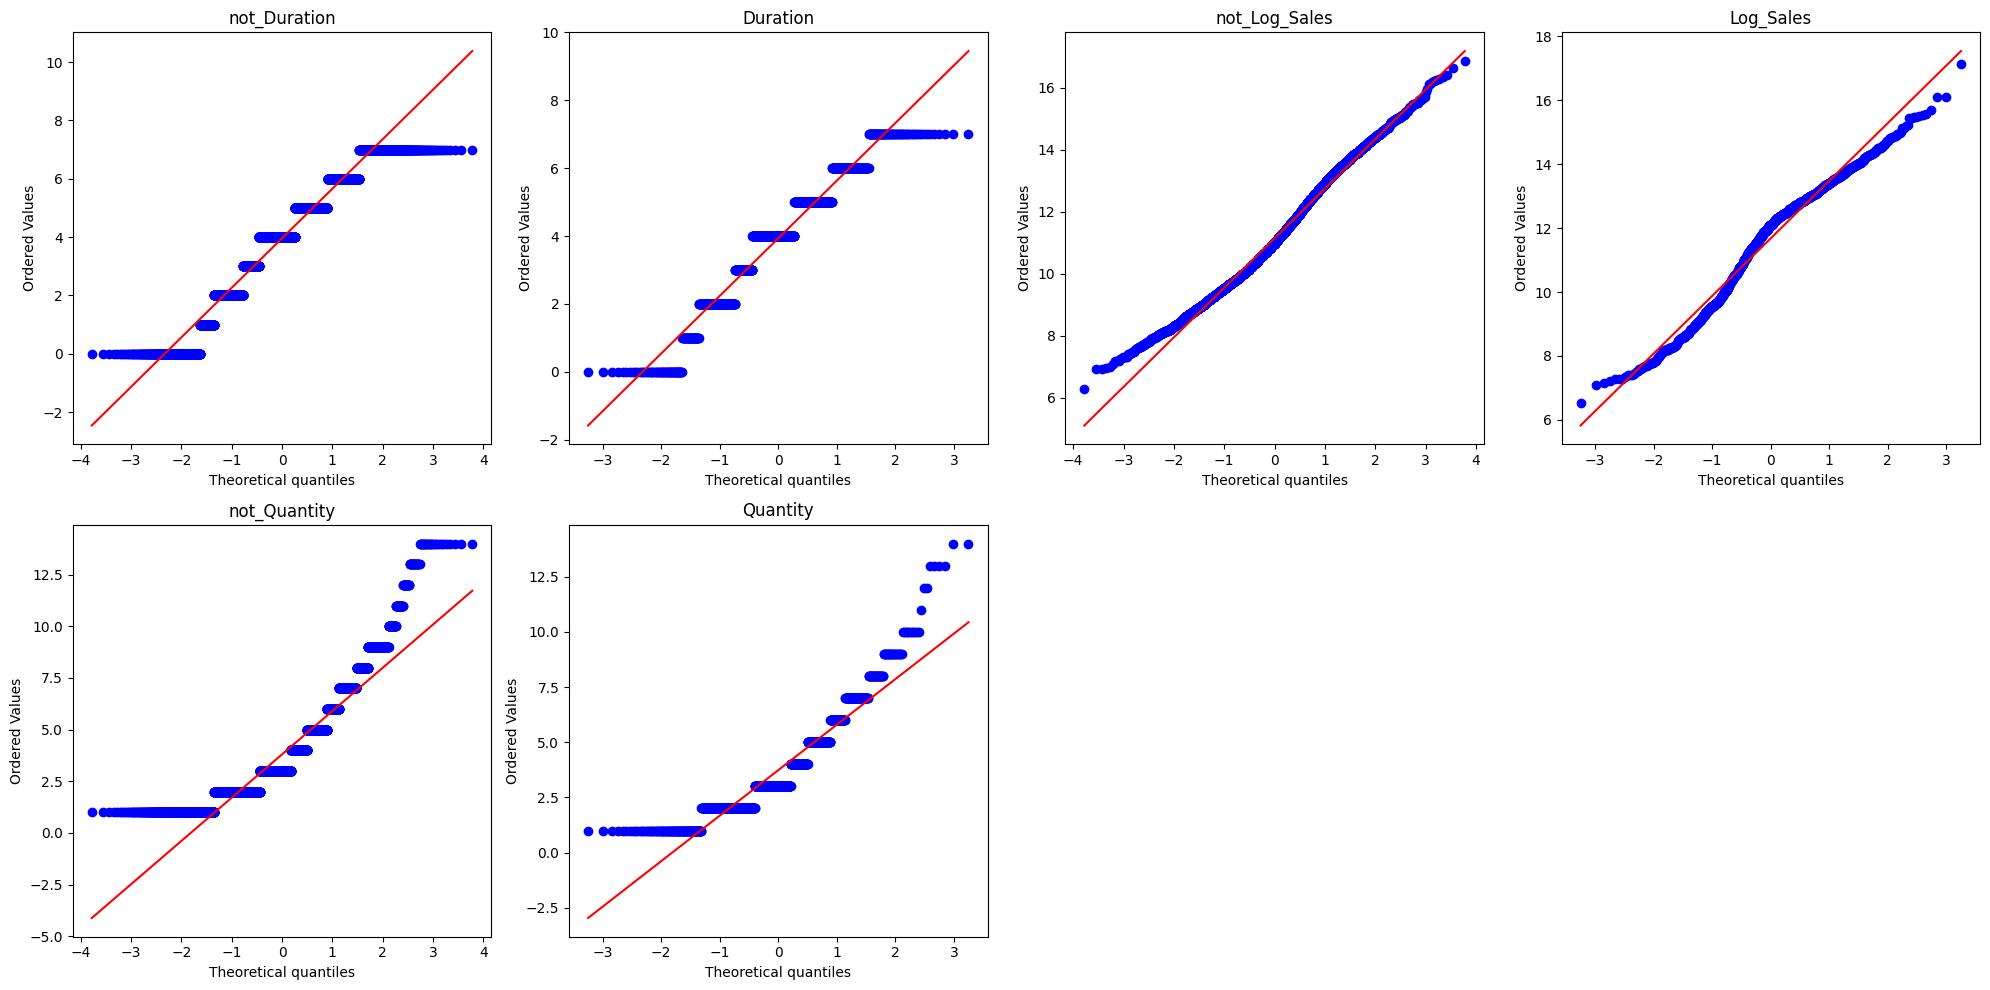

In [26]:
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
stats.probplot(notproblem['duration'], dist="norm", plot=plt)
plt.title('not_Duration')
plt.subplot(2,4,2)
stats.probplot(problem['duration'], dist="norm", plot=plt)
plt.title('Duration')

plt.subplot(2,4,3)
stats.probplot(notproblem['log_sales'], dist="norm", plot=plt)
plt.title('not_Log_Sales')
plt.subplot(2,4,4)
stats.probplot(problem['log_sales'], dist="norm", plot=plt)
plt.title('Log_Sales')

plt.subplot(2,4,5)
stats.probplot(notproblem['Quantity'], dist="norm", plot=plt)
plt.title('not_Quantity')
plt.subplot(2,4,6)
stats.probplot(problem['Quantity'], dist="norm", plot=plt)
plt.title('Quantity')

plt.tight_layout()
plt.show()

In [27]:
result1=[]

for i in numerical:
  whitney_u,whitney_p=stats.mannwhitneyu(notproblem[i], problem[i])
  result1.append({'연속형 변수':i,'P Value':whitney_p,'분포 차이':'있음' if whitney_p < 0.05 else '없음'})

summary1=pd.DataFrame(result1)
summary1

,연속형 변수,P Value,분포 차이
0,duration,5.577529e-01,없음
1,log_sales,9.250872e-30,있음
2,Quantity,3.667634e-01,없음


In [29]:
categorical=['Customer Segment','Address Region','Address SD','Address SGG','Discount_level']

result2 = []

for i in categorical:
  table=pd.DataFrame({'이익 제품':notproblem[i].value_counts(),'손해 제품': problem[i].value_counts()}).fillna(0)

  chi2, pvalue, dof, expected = stats.chi2_contingency(table)

  result2.append({'범주형 변수': i, 'Chi2': chi2, 'p-value': pvalue, '유의성': '유의' if pvalue < 0.05 else '유의하지 않음'})

summary2=pd.DataFrame(result2)
summary2

,범주형 변수,Chi2,p-value,유의성
0,Customer Segment,3.202177,2.016769e-01,유의하지 않음
1,Address Region,3.113959,6.824219e-01,유의하지 않음
2,Address SD,14.858531,5.350234e-01,유의하지 않음
3,Address SGG,178.519265,9.171293e-01,유의하지 않음
4,Discount_level,1097.250202,1.437587e-237,유의
